fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
Acuraccy: 0.68


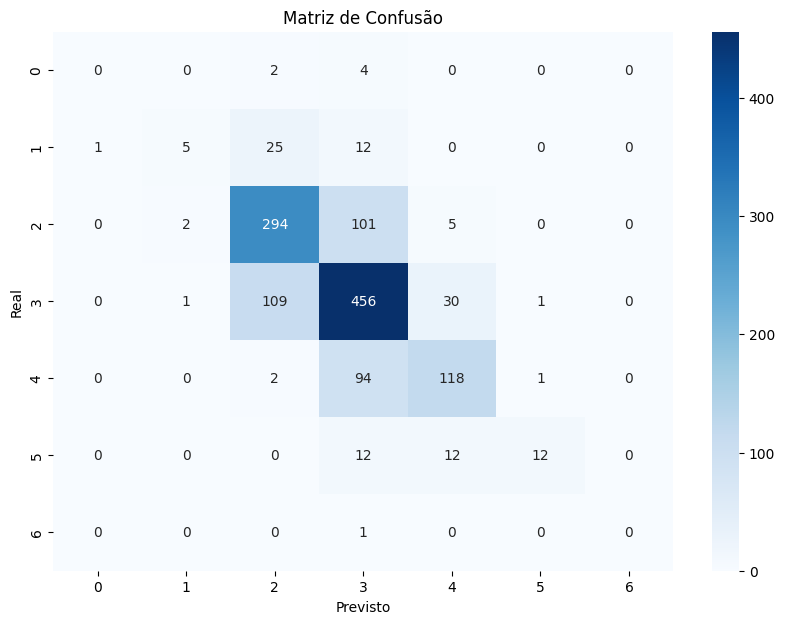

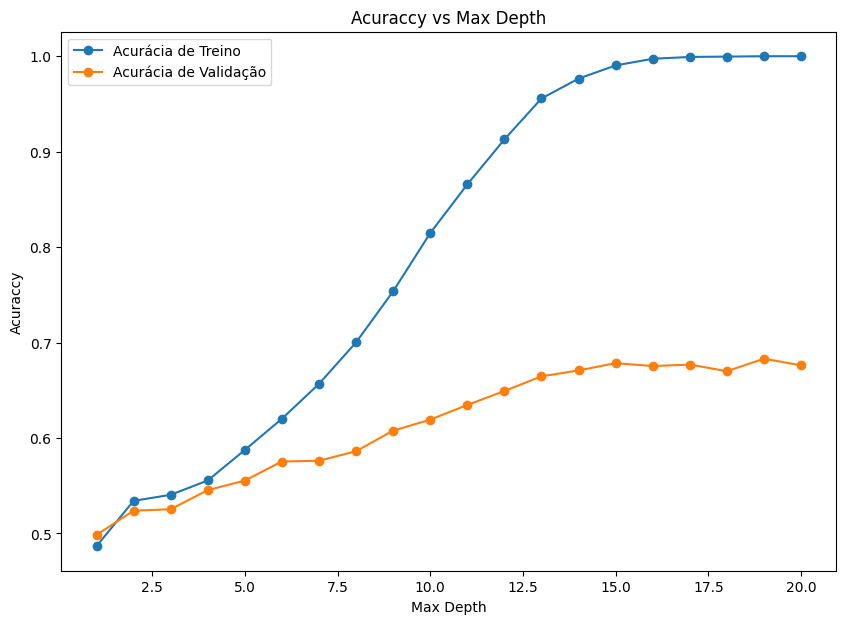

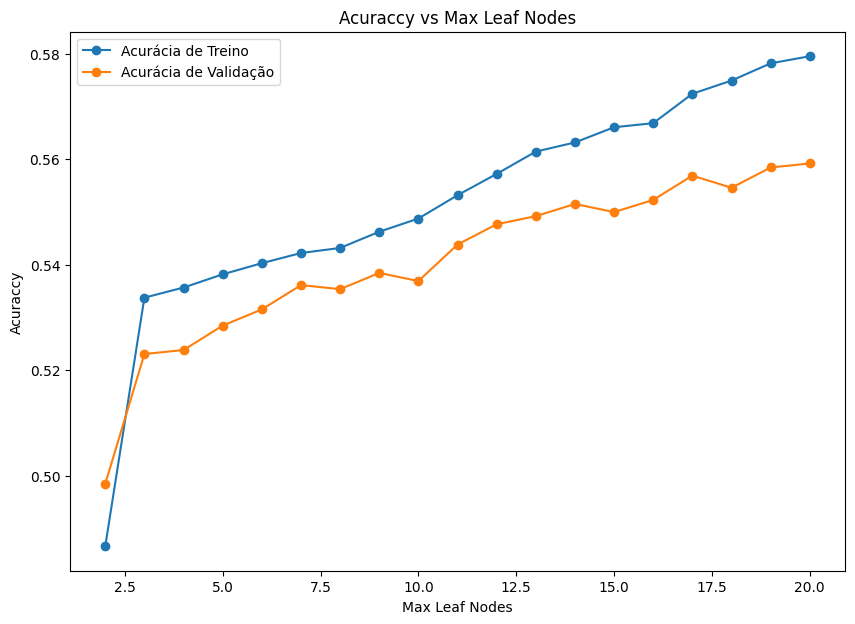

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os conjuntos de dados de qualidade do vinho a partir dos URLs
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Ler os conjuntos de dados
red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

# Adicionar uma coluna para diferenciar os vinhos tintos e brancos
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combinar os conjuntos de dados
data = pd.concat([red_wine, white_wine], ignore_index=True)

# Verificar valores em falta
print(data.isnull().sum())

# Separar as características e a variável alvo
X = data.drop('quality', axis=1)
y = data['quality']

# Definir o transformador de colunas para lidar com diferentes tipos de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns[:-1]),
        ('cat', OneHotEncoder(), ['type'])
    ])

# Criar um pipeline que primeiro transforma os dados e depois ajusta o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = pipeline.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acuraccy: {accuracy:.2f}')

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Testar diferentes valores para max_depth
max_depths = range(1, 21)
train_accuracies_max_depth = []
val_accuracies_max_depth = []

for max_depth in max_depths:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(max_depth=max_depth, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_accuracies_max_depth.append(accuracy_score(y_train, y_train_pred))
    val_accuracies_max_depth.append(accuracy_score(y_test, y_test_pred))

# Plotar a acurácia vs max_depth
plt.figure(figsize=(10, 7))
plt.plot(max_depths, train_accuracies_max_depth, marker='o', label='Acurácia de Treino')
plt.plot(max_depths, val_accuracies_max_depth, marker='o', label='Acurácia de Validação')
plt.xlabel('Max Depth')
plt.ylabel('Acuraccy')
plt.title('Acuraccy vs Max Depth')
plt.legend()
plt.show()

# Testar diferentes valores para max_leaf_nodes
max_leaf_nodes_values = range(2, 21)
train_accuracies_max_leaf_nodes = []
val_accuracies_max_leaf_nodes = []

for max_leaf_nodes in max_leaf_nodes_values:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_accuracies_max_leaf_nodes.append(accuracy_score(y_train, y_train_pred))
    val_accuracies_max_leaf_nodes.append(accuracy_score(y_test, y_test_pred))

# Plotar a acurácia vs max_leaf_nodes
plt.figure(figsize=(10, 7))
plt.plot(max_leaf_nodes_values, train_accuracies_max_leaf_nodes, marker='o', label='Acurácia de Treino')
plt.plot(max_leaf_nodes_values, val_accuracies_max_leaf_nodes, marker='o', label='Acurácia de Validação')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Acuraccy')
plt.title('Acuraccy vs Max Leaf Nodes')
plt.legend()
plt.show()
